In [1]:
import pandas as pd
# csv 파일을 로딩
df = pd.read_csv("c:/data/ozone/ozone2.csv")
df.head()

,Ozone,Solar.R,Wind,Temp,Month,Day,Result
0,41.00000,190.000000,7.4,67,5,1,0
1,36.00000,118.000000,8.0,72,5,2,0
2,12.00000,149.000000,12.6,74,5,3,0
3,18.00000,313.000000,11.5,62,5,4,0
4,42.12931,185.931507,14.3,56,5,5,1


In [2]:
df.columns


Index(['Ozone', 'Solar.R', 'Wind', 'Temp', 'Month', 'Day', 'Result'], dtype='object')

In [3]:
df.shape

(153, 7)

In [4]:
df.describe()


,Ozone,Solar.R,Wind,Temp,Month,Day,Result
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,42.129310,185.931507,9.957516,77.882353,6.993464,15.803922,0.529412
std,28.693372,87.960267,3.523001,9.465270,1.416522,8.864520,0.500773
min,1.000000,7.000000,1.700000,56.000000,5.000000,1.000000,0.000000
25%,21.000000,120.000000,7.400000,72.000000,6.000000,8.000000,0.000000
50%,42.129310,194.000000,9.700000,79.000000,7.000000,16.000000,1.000000
75%,46.000000,256.000000,11.500000,85.000000,8.000000,23.000000,1.000000
max,168.000000,334.000000,20.700000,97.000000,9.000000,31.000000,1.000000


c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' 분류\n (0: 부족, 1: 정상)')

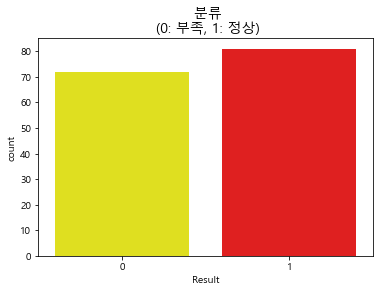

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
#한글 처리를 위해 폰트 설정
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
colors = ["yellow", "red"]
sns.countplot('Result', data=df, palette=colors)
plt.title(' 분류\n (0: 부족, 1: 정상)', fontsize=14)
#불균형 데이터셋


In [6]:
cols=['Solar.R', 'Wind', 'Temp']
X = df[cols] # 독립변수
y = df['Result'] # 종속변수

array([[<AxesSubplot:xlabel='Solar.R', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Wind', ylabel='Solar.R'>,
        <AxesSubplot:xlabel='Temp', ylabel='Solar.R'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Wind'>,
        <AxesSubplot:xlabel='Wind', ylabel='Wind'>,
        <AxesSubplot:xlabel='Temp', ylabel='Wind'>],
       [<AxesSubplot:xlabel='Solar.R', ylabel='Temp'>,
        <AxesSubplot:xlabel='Wind', ylabel='Temp'>,
        <AxesSubplot:xlabel='Temp', ylabel='Temp'>]], dtype=object)

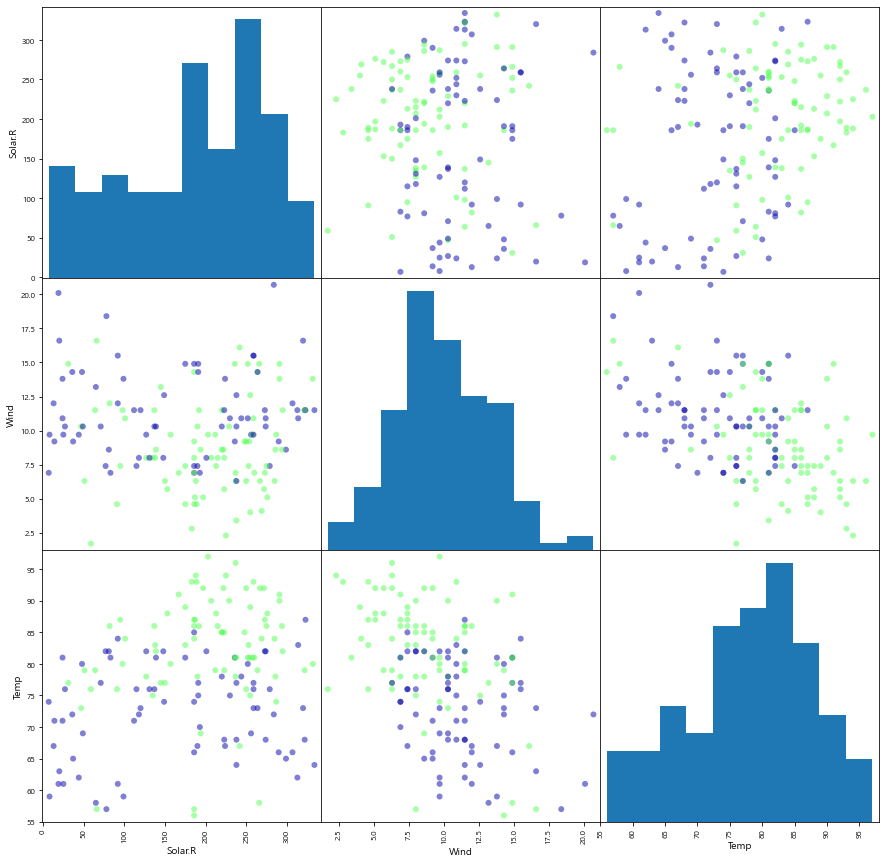

In [7]:
import mglearn
#산점도 행렬 출력
pd.plotting.scatter_matrix(X, c=y, figsize=(15, 15), marker='o', cmap=mglearn.cm3)

In [8]:
#언더샘플링
from imblearn.under_sampling import RandomUnderSampler
X_sample, y_sample = RandomUnderSampler(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [9]:
#오버샘플링
from imblearn.over_sampling import SMOTE
X_sample,y_sample=SMOTE(random_state=0).fit_resample(X, y)
X_samp = pd.DataFrame(data=X_sample,columns=cols )
y_samp = pd.DataFrame(data=y_sample,columns=['Result'])
df_samp=pd.concat([X_samp,y_samp],axis=1)

In [10]:
df_samp["Result"].value_counts()

0    81
1    81
Name: Result, dtype: int64

c:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, ' 분류\n (0: 부족, 1: 정상)')

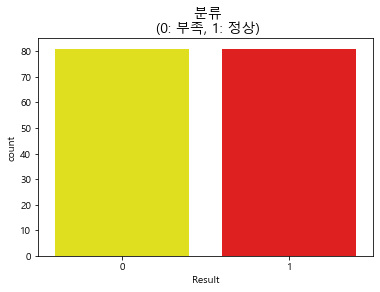

In [11]:
colors = ["yellow", "red"]
sns.countplot('Result', data=df_samp, palette=colors)
plt.title(' 분류\n (0: 부족, 1: 정상)', fontsize=14)

In [12]:
cols=['Solar.R', 'Wind', 'Temp']
X = X_samp[cols]
y = y_samp['Result']


In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

최적의 k: 4


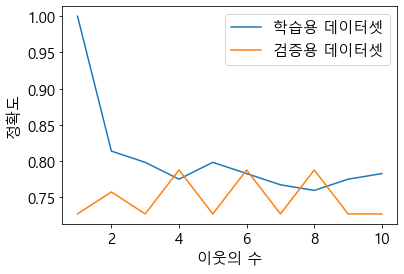

In [27]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
train_rate = []
test_rate = []
# 새로운 데이터 포인트에 가장 가까운 k개의 이웃을 찾는다
# k의 값에 따라 결과가 달라지므로 어떤 값이 최적인지 찾아내는 것이 필요함
# 1에서 10까지 n_neighbors를 적용
neighbors = range(1, 11)
for n in neighbors:
    # 모델 생성
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    # 학습용 데이터셋의 정확도
    train_rate.append(knn.score(X_train, y_train))
    # 검증용 데이터셋의 정확도
    test_rate.append(knn.score(X_test, y_test))
plt.rcParams["font.size"]=15
plt.plot(neighbors, train_rate, label="학습용 데이터셋") 
plt.plot(neighbors, test_rate, label="검증용 데이터셋")
plt.ylabel("정확도") 
plt.xlabel("이웃의 수")
plt.legend()
max_rate=max(test_rate)
idx=np.argmax(test_rate)
print('최적의 k:',idx+1) 
# 학습용 데이터셋의 경우 이웃이 1개일 때 100% 예측
# 이웃의 수가 늘어나면 학습용 데이터셋의 경우 모델이 단순해지고 정확도는 줄어든다.
# 5개를 사용했을 때 테스트 정확도가 가장 높다.

In [28]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
import numpy as np
pred=model.predict(X_test)
print(" 학습용: ",model.score(X_train, y_train)) 
print(" 검증용: ",model.score(X_test, y_test)) 
print(" 검증용: ",np.mean(pred == y_test)) 

 학습용:  0.7984496124031008
 검증용:  0.7272727272727273
 검증용:  0.7272727272727273


In [30]:
# confusion matrix (혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred)

array([[11,  4],
       [ 5, 13]], dtype=int64)

In [31]:
df_cm=pd.DataFrame(cm, index=[0, 1], columns=[0, 1])
df_cm

,0,1
0,11,4
1,5,13


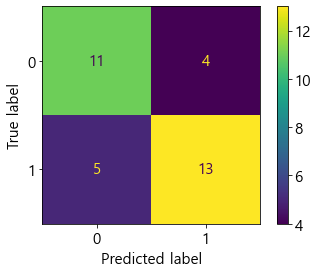

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_).plot()